# 6. Ranking und Conclusion

In [1]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv("predicted_passengersWW.csv")
# Define average spending amounts for each category based on the defined ranges
average_spending_per_category = {
    0: 5,    # Average of 0-10 EUR
    1: 30,   # Average of 10-50 EUR
    2: 100,  # Average of 50-150 EUR
    3: 225,  # Average of 150-300 EUR
    4: 400   # Average of 300-500 EUR
}

# Map the 'predicted_spending_category' to the average spending amount
df['predicted_spending'] = df['predicted_spending_category'].map(average_spending_per_category)

# Group by 'shopped_at' (airport) and sum the predicted spending to get total profitability per airport
profitability_per_airport = df.groupby('shopped_at')['predicted_spending'].sum().reset_index()

# Rename columns for clarity
profitability_per_airport.rename(columns={'shopped_at': 'Airport Code', 'predicted_spending': 'Total Predicted Spending'}, inplace=True)

# Display the results
profitability_per_airport.sort_values(by='Total Predicted Spending', ascending=False)


,Airport Code,Total Predicted Spending
4,17,859015
3,16,770900
6,19,726480
0,8,482365
10,29,482185
5,18,478500
1,11,461805
8,26,442250
9,28,418075
11,30,390135


### Costen of the airports

In [3]:
# Load the newly provided CSV file to analyze the terms of lease
lease_df = pd.read_csv('cleaned_terms_of_lease.csv')

# Display the first few rows of the dataframe to understand its structure
lease_df

,Airport;total_price
0,DFW;10584
1,SIN;13284
2,PVG;13452
3,PEK;18156
4,KUL;27132
5,JFK;31428
6,HND;32292
7,DXB;41676
8,HKG;50400
9,SFO;60816


In [5]:
airport_df = pd.read_csv('cleaned_airport.csv')

In [6]:
# Load the cleaned terms of lease CSV file again to ensure we have the correct data loaded
lease_df = pd.read_csv('cleaned_terms_of_lease.csv')

# Since the previous analysis was based on a simulated mapping, let's now establish a real mapping based on 'iata_code'
# Merge the airport dataframe with the lease dataframe on 'iata_code' to get the corresponding 'Airport_ID'
merged_df = pd.merge(lease_df, airport_df, left_on='Airport', right_on='iata_code', how='inner')

# Now, we have 'Airport_ID' which we can use to match the profitability analysis done earlier
# Merge this dataframe with the profitability dataframe on 'Airport Code' and 'Airport_ID'
profitability_with_lease_real = pd.merge(profitability_per_airport, merged_df, left_on='Airport Code', right_on='Airport_ID', how='left')

# Calculate the real profit by subtracting 'total_price' from 'Total Predicted Spending'
profitability_with_lease_real['Profit'] = profitability_with_lease_real['Total Predicted Spending'] - profitability_with_lease_real['total_price']

# Select relevant columns for the final output
final_profitability_real = profitability_with_lease_real[['Airport Code', 'Total Predicted Spending', 'total_price', 'Profit', 'name', 'iata_code']]

# Sort by 'Profit' from highest to lowest
final_profitability_real_sorted = final_profitability_real.sort_values(by='Profit', ascending=False)

# Display the sorted profitability dataframe
final_profitability_real_sorted


,Airport Code,Total Predicted Spending,total_price,Profit,name,iata_code
4,17,859015,32292,826723,Tokyo Haneda International Airport,HND
3,16,770900,50400,720500,Hong Kong International Airport,HKG
6,19,726480,27132,699348,Kuala Lumpur International Airport,KUL
0,8,482365,10584,471781,Dallas Fort Worth International Airport,DFW
5,18,478500,31428,447072,John F Kennedy International Airport,JFK
8,26,442250,18156,424094,Beijing Capital International Airport,PEK
10,29,482185,60816,421369,San Francisco International Airport,SFO
1,11,461805,41676,420129,Dubai International Airport,DXB
9,28,418075,13452,404623,Shanghai Pudong International Airport,PVG
11,30,390135,13284,376851,Singapore Changi Airport,SIN


In [9]:
import matplotlib.pyplot as plt

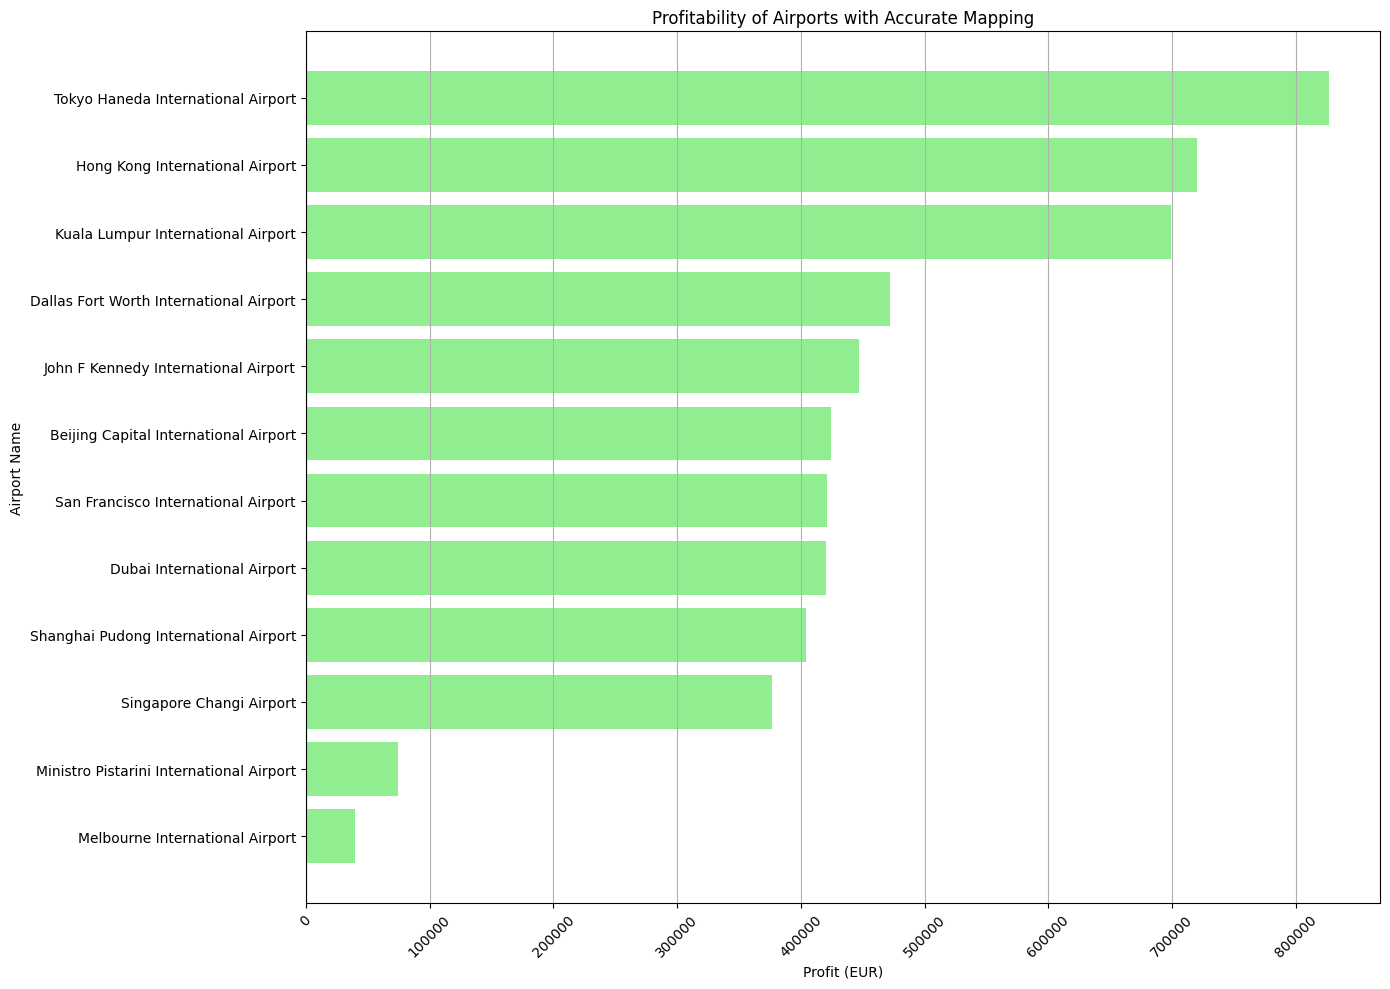

In [10]:
# Plotting the real profitability with accurate airport names

# Remove rows with NaN values in 'Profit' for visualization
final_profitability_real_clean = final_profitability_real_sorted.dropna(subset=['Profit'])

# Plot
plt.figure(figsize=(14, 10))
plt.barh(final_profitability_real_clean['name'], final_profitability_real_clean['Profit'], color='lightgreen')
plt.xlabel('Profit (EUR)')
plt.ylabel('Airport Name')
plt.title('Profitability of Airports with Accurate Mapping')
plt.xticks(rotation=45)
plt.grid(axis='x')

# Invert y-axis to have the highest profit at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()
